<img src="imagens/1.png">

<img src="imagens/2.png">

<img src="imagens/3.png">

# 1. Eliminação de Valores Inválidos
A eliminação de valores inválidos é uma etapa importante no pré-processamento de dados para muitas tarefas de machine learning. 

Dados incompletos, inconsistentes ou inválidos podem afetar negativamente a precisão dos modelos de machine learning.

In [1]:
#bibliotecas utilizadas nesta aula
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from statsmodels.formula.api import ols
import os
from scipy.special import gamma

In [2]:
data1 = {'Nome': ['João', 'Maria', 'Pedro', 'Julia', 'Lucas'],
        'Idade': [20, 25, np.nan, 30, 40],
        'Sexo': ['M', 'F', 'M', np.nan, 'M'],
        'Altura': [1.70, 1.60, 1.80, np.nan, 1.75],
        'Peso': [70, 60, np.nan, 65, 80],
        'Salario': [3000, np.nan, 2500, 3500, 4000]}

df = pd.DataFrame(data1)

In [3]:
print(df)

    Nome  Idade Sexo  Altura  Peso  Salario
0   João   20.0    M    1.70  70.0   3000.0
1  Maria   25.0    F    1.60  60.0      NaN
2  Pedro    NaN    M    1.80   NaN   2500.0
3  Julia   30.0  NaN     NaN  65.0   3500.0
4  Lucas   40.0    M    1.75  80.0   4000.0


**Neste exemplo, temos um DataFrame com informações sobre algumas pessoas, onde alguns valores estão faltando ou são inválidos.**

*Vamos agora criar funções para lidar com esses valores.*

## 1.1. Eliminando linhas ou colunas que contêm valores inválidos

A primeira estratégia que vamos implementar é a eliminação de linhas ou colunas que contêm valores inválidos. 

Para isso, podemos usar o método `dropna()` do Pandas.

In [4]:
"""
Remove as linhas ou colunas que contêm valores inválidos

Parâmetros:
    df (DataFrame): DataFrame com os dados
    axis (int): 0 (padrão) para remover as linhas, 1 para remover as colunas

Retorno:
    DataFrame: DataFrame sem as linhas ou colunas com valores inválidos
"""

def drop_invalid_values(df, axis=0):

    return df.dropna(axis=axis)

In [5]:
print(drop_invalid_values(df))

    Nome  Idade Sexo  Altura  Peso  Salario
0   João   20.0    M    1.70  70.0   3000.0
4  Lucas   40.0    M    1.75  80.0   4000.0


**A função acima recebe um `DataFrame` e um parâmetro `axis` indicando se queremos remover linhas (valor padrão) ou colunas com valores inválidos. O método `dropna()` retorna um novo `DataFrame` sem as linhas ou colunas com valores inválidos.**

## 1.2. Substituindo valores inválidos

A segunda estratégia que vamos implementar é a substituição de valores inválidos. Para isso, podemos usar o método `fillna()` do Pandas

In [6]:
"""
Substitui os valores inválidos por outros valores
    
Parâmetros:
    
    df (DataFrame): DataFrame com os dados
    
    method (str): Método de substituição (padrão='mean')
        - 'mean': substitui por a média da coluna
        - 'median': substitui por a mediana da coluna
        - 'mode': substitui por a moda da coluna
        - 'zero': substitui por zero
        - 'custom': substitui por um valor personalizado especificado no parâmetro 'custom_value'
        - 'ffill': substitui pelo valor anterior (forward fill)
        - 'bfill': substitui pelo valor seguinte (backward fill)
    
Retorno:
    DataFrame: DataFrame com os valores inválidos substituídos
"""

"\nSubstitui os valores inválidos por outros valores\n    \nParâmetros:\n    \n    df (DataFrame): DataFrame com os dados\n    \n    method (str): Método de substituição (padrão='mean')\n        - 'mean': substitui por a média da coluna\n        - 'median': substitui por a mediana da coluna\n        - 'mode': substitui por a moda da coluna\n        - 'zero': substitui por zero\n        - 'custom': substitui por um valor personalizado especificado no parâmetro 'custom_value'\n        - 'ffill': substitui pelo valor anterior (forward fill)\n        - 'bfill': substitui pelo valor seguinte (backward fill)\n    \nRetorno:\n    DataFrame: DataFrame com os valores inválidos substituídos\n"

In [7]:
def replace_invalid_values(df, method='mean'):

    if method == 'mean':
        return df.fillna(df.mean())
    elif method == 'median':
        return df.fillna(df.median())
    elif method == 'mode':
        return df.fillna(df.mode().iloc[0])
    elif method == 'zero':
        return df.fillna(0)
    elif method == 'custom':
        custom_value = input("Insira um valor personalizado para substituir os valores inválidos: ")
        return df.fillna(custom_value)
    elif method == 'ffill':
        return df.fillna(method='ffill')
    elif method == 'bfill':
        return df.fillna(method='bfill')
    else:
        return df

In [8]:
print(replace_invalid_values(df, 'mode'))

    Nome  Idade Sexo  Altura  Peso  Salario
0   João   20.0    M    1.70  70.0   3000.0
1  Maria   25.0    F    1.60  60.0   2500.0
2  Pedro   20.0    M    1.80  60.0   2500.0
3  Julia   30.0    M    1.60  65.0   3500.0
4  Lucas   40.0    M    1.75  80.0   4000.0


**A função acima recebe um DataFrame e um parâmetro `method` indicando qual método de substituição de valores inválidos deve ser utilizado. As opções disponíveis são: substituição pela média (`mean`), mediana (`median`), moda (`mode`), zero (`zero`), um valor personalizado (`custom`) especificado pelo usuário, valor anterior (`ffill`) ou valor seguinte (`bfill`).**



**Se o método escolhido for substituição por valor personalizado (`custom`), a função solicita ao usuário que insira um valor para ser usado como substituto. Caso contrário, a função aplica o método escolhido usando o método `fillna()` do Pandas.**

## 1.3. Tratamento de valores inválidos como uma categoria separada

Por fim, vamos implementar a estratégia de tratamento de valores inválidos como uma categoria separada. Para isso, podemos usar o método `fillna()` do Pandas e atribuir um valor específico para os valores inválidos.

In [9]:
"""
Trata os valores inválidos como uma categoria separada
    
Parâmetros:
    
    df (DataFrame): DataFrame com os dados
    
    category (str): Categoria a ser usada para valores inválidos (padrão='Desconhecido')
    
Retorno:
    DataFrame: DataFrame com os valores inválidos substituídos pela categoria especificada
"""

def treat_invalid_values_as_category(df, category='Desconhecido'):
    
    return df.fillna(category)

In [10]:
print(treat_invalid_values_as_category(df, 'inválido'))

    Nome     Idade      Sexo    Altura      Peso   Salario
0   João      20.0         M       1.7      70.0    3000.0
1  Maria      25.0         F       1.6      60.0  inválido
2  Pedro  inválido         M       1.8  inválido    2500.0
3  Julia      30.0  inválido  inválido      65.0    3500.0
4  Lucas      40.0         M      1.75      80.0    4000.0


**A função acima recebe um DataFrame e um parâmetro category indicando qual categoria deve ser usada para substituir os valores inválidos. A função então usa o método `fillna()` do Pandas para substituir os valores inválidos pela categoria especificada.**

<img src="imagens/4.png">

### Análise de outliers é um importante conceito em aprendizado de máquina que pode ajudar a melhorar a qualidade dos dados

**Um outlier é um ponto de dados que se afasta significativamente dos outros pontos em um conjunto de dados.**

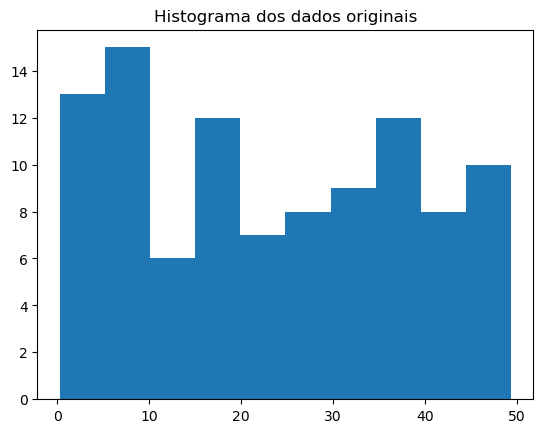

In [11]:
# Criando um conjunto de dados com valores aleatórios entre 0 e 50
np.random.seed(42)
data = np.random.rand(100) * 50

# Imprimindo os dados antes de introduzir os outliers
# print("Dados originais:\n", data)

# Histograma dos dados originais
plt.hist(data, bins=10)
plt.title("Histograma dos dados originais")
plt.show()

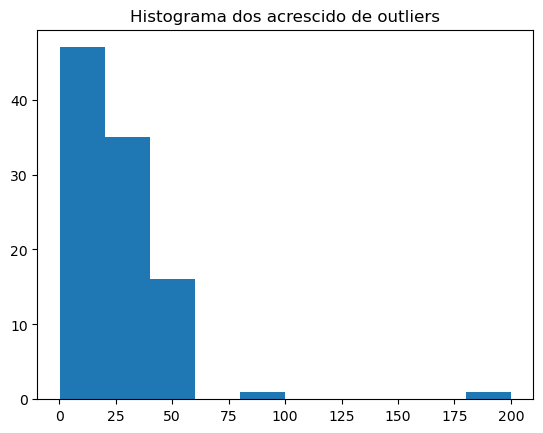

In [12]:
# Introduzindo outliers no conjunto de dados
data[20] = 200  # Outlier grande usando métodos baseados em distância
data[30] = 100  # Outlier médio usando métodos estatísticos
data[80] = 5    # Outlier pequeno usando abordagens baseadas em modelo

# Imprimindo os dados depois de introduzir os outliers
# print("Dados originais:\n", data)


# Histograma dos dados acrescido de outliers
plt.hist(data, bins=10)
plt.title("Histograma dos acrescido de outliers")
plt.show()

## Z-score

**A técnica de Z-score é uma medida estatística que indica a quantos desvios padrão de distância um valor está em relação à média de um conjunto de dados. Valores que estão muito longe da média, ou seja, que possuem um Z-score alto, são considerados outliers.**

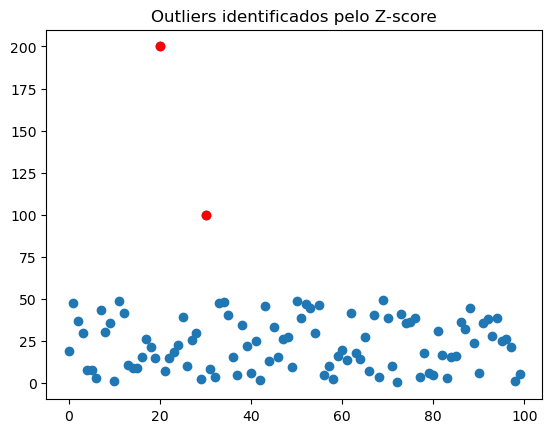

In [50]:
# Aplicando a técnica de Z-score para detecção de outliers
outliers_zscore = np.where(np.abs((data - np.mean(data)) / np.std(data)) > 3)

# Plot dos dados com os outliers identificados pelo Z-score
plt.scatter(range(len(data)), data)
plt.scatter(outliers_zscore, data[outliers_zscore], color="red")
plt.title("Outliers identificados pelo Z-score")
plt.show()

## K-means

**O K-means é um algoritmo de aprendizagem não supervisionada que busca dividir um conjunto de dados em K grupos distintos, sendo K um parâmetro definido previamente.**

In [14]:
# Aplicando o algoritmo K-means para detecção de outliers
km = KMeans(n_clusters=2, n_init='auto')
km.fit(data.reshape(-1, 1))
centers = km.cluster_centers_
outliers_kmeans = np.where((data < centers[0] - 2*np.std(data)) | (data > centers[1] + 2*np.std(data)))

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
print(np.__version__)
# Plot dos dados com os outliers identificados pelo K-means
plt.scatter(range(len(data)), data)
plt.scatter(outliers_kmeans, data[outliers_kmeans], color="red")
plt.title("Outliers identificados pelo K-means")
plt.show()

## Abordagem baseada em modelo - Análise de Resíduos para detectar outliers em um conjunto de dados.

**Na abordagem baseada em modelo, um modelo estatístico é ajustado aos dados e, em seguida, os pontos que não se encaixam bem no modelo são considerados outliers**

In [26]:
# Aplicando a técnica de Análise de Resíduos para detecção de outliers
df = pd.DataFrame({'x': range(len(data)), 'y': data})
model = ols("y ~ x", data=df).fit()
infl = model.get_influence()
outliers_resid = infl.summary_frame().loc[infl.summary_frame()['cooks_d'] > 0.05].index.tolist()

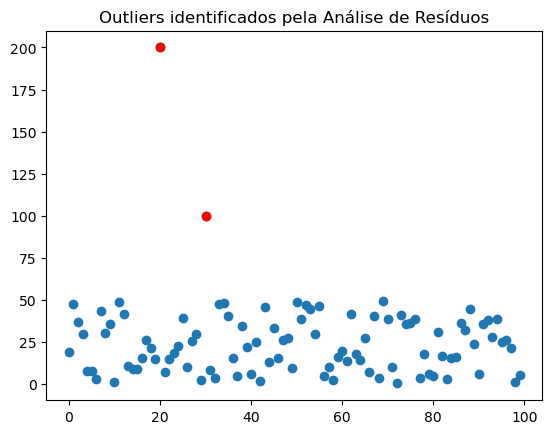

In [27]:
# Plot dos dados com os outliers identificados pela Análise de Resíduos
plt.scatter(range(len(data)), data)
plt.scatter(outliers_resid, data[outliers_resid], color="red")
plt.title("Outliers identificados pela Análise de Resíduos")
plt.show()

Nesta versão do código, incluímos gráficos para visualizar os resultados das três técnicas de detecção de outliers que usamos:

- Um histograma dos dados originais para ver a distribuição dos valores;
- Um gráfico de dispersão que mostra todos os dados, com os outliers detectados pelo Z-score destacados em vermelho;
- Um gráfico de dispersão que mostra todos os dados, com os outliers detectados pelo algoritmo K-means destacados em vermelho;
- Um gráfico de dispersão que mostra todos os dados, com os outliers detectados pela análise de resíduos destacados em vermelho;
- Um histograma dos dados após a substituição dos outliers pelos valores médios.

**Esses gráficos devem ajudar a entender melhor como cada técnica funciona e como os outliers são detectados. Além disso, a substituição dos outliers pelos valores médios permite que os dados sejam analisados de forma mais precisa, sem distorções causadas pelos valores extremos.**

In [28]:
# Imprimir os índices dos outliers detectados por cada técnica
print("Outliers detectados por Z-score:\n", outliers_zscore[0])
#print("Outliers detectados por K-means:\n", outliers_kmeans[0])
print("Outliers detectados por Análise de Resíduos:\n", outliers_resid)

Outliers detectados por Z-score:
 [20 30]
Outliers detectados por Análise de Resíduos:
 [20, 30]


In [29]:
# Substituindo os outliers pelos valores médios dos dados
data[outliers_zscore] = np.mean(data)
#data[outliers_kmeans] = np.mean(data)
data[outliers_resid] = np.mean(data)

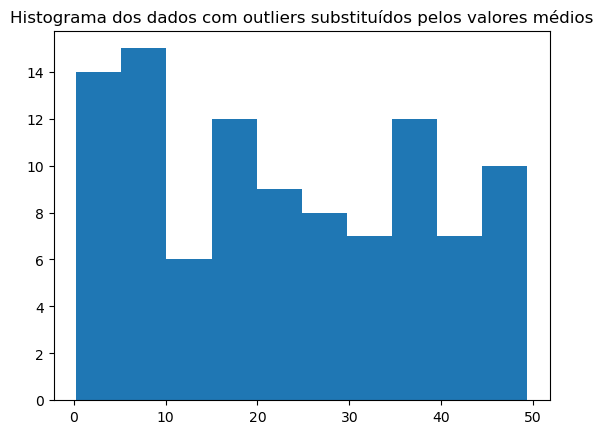

In [30]:
# Histograma dos dados com os outliers substituídos pelos valores médios
plt.hist(data, bins=10)
plt.title("Histograma dos dados com outliers substituídos pelos valores médios")
plt.show()

<img src="imagens/5.png">]

### O objetivo do boxplot é apresentar uma representação resumida das principais características de um conjunto de dados, como a mediana, quartis, mínimo, máximo e possíveis outliers

<img src="imagens/boxPlotExample.png">

**Utilizando a função `np.random.normal()` para gerar um conjunto de dados aleatórios com uma distribuição normal com média zero (`loc=0.0`) e desvio padrão um (`scale=1.0`). O conjunto de dados tem 100 elementos**

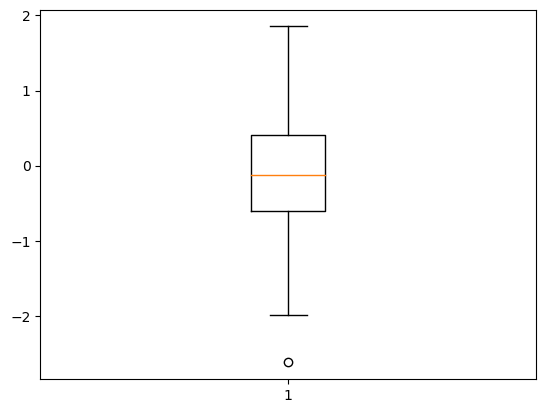

In [52]:
np.random.seed(42)
data2 = np.random.normal(loc=0.0, scale=1.0, size=100)
fig, ax = plt.subplots()
ax.boxplot(data2)
plt.show()

### Criando quatro conjuntos com 200 dados aleatórios usando a biblioteca `NumPy` do Python. 

**Cada conjunto de dados é gerado usando uma distribuição normal ou poisson com diferentes parâmetros.**

- O primeiro conjunto de dados, dados1, é gerado usando uma distribuição **normal** com média 100 e desvio padrão 20.

- O segundo conjunto de dados, dados2, é gerado usando uma distribuição **normal** com média 80 e desvio padrão 30.

- O terceiro conjunto de dados, dados3, é gerado usando uma distribuição **normal** com média 90 e desvio padrão 10.

- O quarto conjunto de dados, dados4, é gerado usando uma distribuição **poisson** com média 70.

In [55]:
# Criando um conjunto de dados aleatórios
dados1 = np.random.normal(100, 20, 200)
dados2 = np.random.normal(80, 30, 200)
dados3 = np.random.normal(90, 10, 200)
dados4 = np.random.poisson(70, 200) # Distribuição Poisson com média 70

# Combinando os dados em um único conjunto
dados = [dados1, dados2, dados3, dados4]

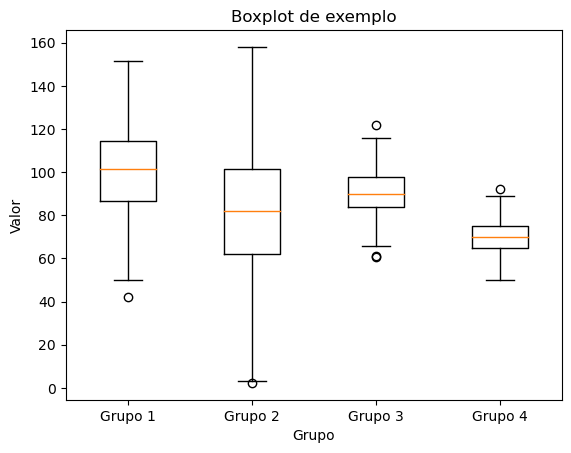

In [56]:
# Criando um boxplot dos dados
fig, ax = plt.subplots()
ax.boxplot(dados)

# Adicionando legendas e título
ax.set_title('Boxplot de exemplo')
ax.set_xlabel('Grupo')
ax.set_ylabel('Valor')

# Adicionando rótulos para cada grupo
rótulos = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4']
ax.set_xticklabels(rótulos)

# Mostrando o gráfico
plt.show()

In [34]:
# Criando um conjunto de dados com valores aleatórios entre 0 e 50
np.random.seed(42)
data = np.random.rand(100) * 50
# Introduzindo outliers no conjunto de dados
data[20] = 200  # Outlier grande usando métodos baseados em distância
data[30] = 100  # Outlier médio usando métodos estatísticos
data[80] = 5    # Outlier pequeno usando abordagens baseadas em modelo

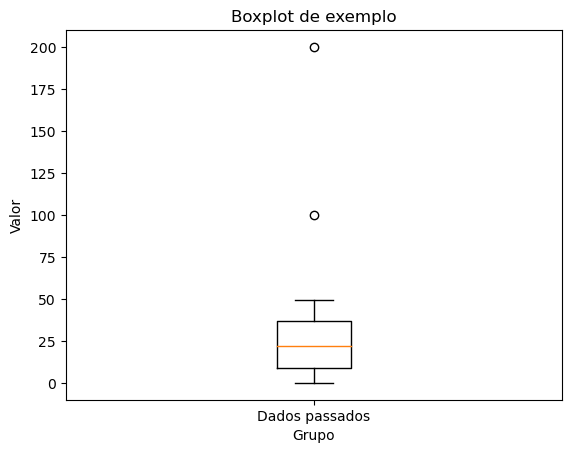

In [35]:
# Criando um boxplot dos dados
fig, ax = plt.subplots()
ax.boxplot(data)

# Adicionando legendas e título
ax.set_title('Boxplot de exemplo')
ax.set_xlabel('Grupo')
ax.set_ylabel('Valor')

# Adicionando rótulos para cada grupo
rótulos = ['Dados passados']
ax.set_xticklabels(rótulos)

# Mostrando o gráfico
plt.show()

<img src="imagens/6.png">

### As distribuições de dados referem-se à maneira como os dados estão distribuídos em relação a uma determinada variável

- **Pode ser usada para entender melhor como os dados se relacionam com essa variável e como isso pode afetar a precisão dos modelos de machine learning**

## Distribuição normal (ou Gaussiana)
**É uma das distribuições mais utilizadas para modelar dados contínuos.**

- É caracterizada por uma função de densidade de probabilidade simétrica em forma de sino
- Descreve a probabilidade de um dado valor ocorrer em um conjunto de dados

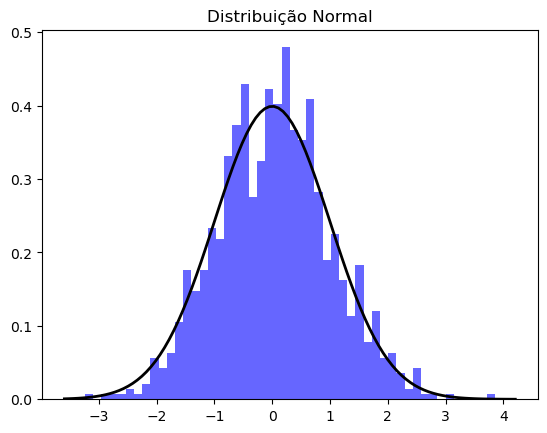

In [36]:
# Distribuição Normal
mean = 0
std = 1
data_normal = np.random.normal(mean, std, 1000)
plt.hist(data_normal, bins=50, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-(x - mean)**2 / (2 * std**2)) / (std * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição Normal')
plt.show()

## Distribuição de Poisson 

**É comumente utilizada para modelar eventos raros em um espaço contínuo.** 

- É caracterizada por uma função de massa de probabilidade discreta
- Descreve a probabilidade de um determinado número de eventos ocorrer em um período de tempo ou espaço

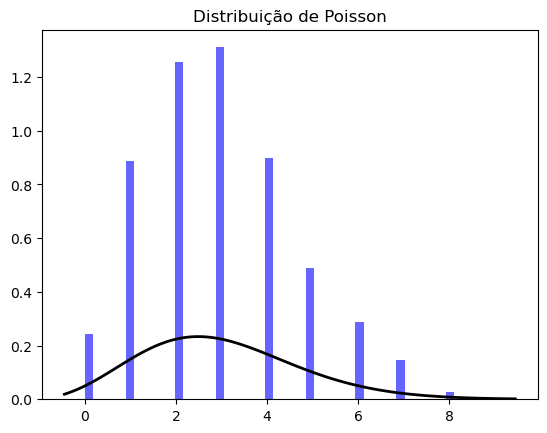

In [37]:
# Distribuição de Poisson
lam = 3
data_poisson = np.random.poisson(lam, 1000)
plt.hist(data_poisson, bins=50, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-lam) * lam**x / gamma(x + 1)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição de Poisson')
plt.show()

## Distribuição Exponencial

**É frequentemente usada para modelar eventos que ocorrem em um período de tempo conhecido.** 

- Caracterizada por uma função de densidade de probabilidade contínua 
- Descreve a probabilidade de um evento ocorrer em um determinado intervalo de tempo

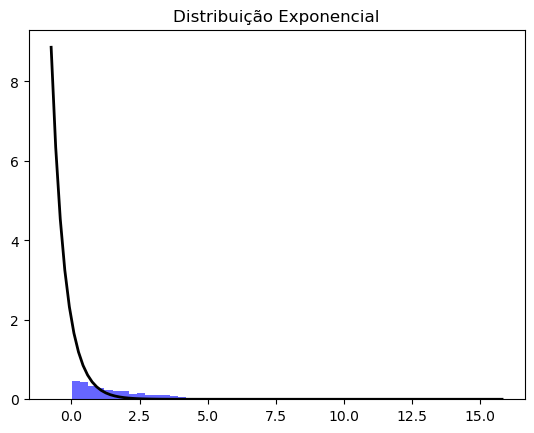

In [38]:
# Distribuição Exponencial
beta = 2
data_exponential = np.random.exponential(beta, 1000)
plt.hist(data_exponential, bins=50, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = beta * np.exp(-beta * x)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição Exponencial')
plt.show()

## Distribuição Uniforme
**É frequentemente usada em simulações e modelagem de probabilidade, especialmente em situações em que não há informações adicionais disponíveis sobre a distribuição dos dados**

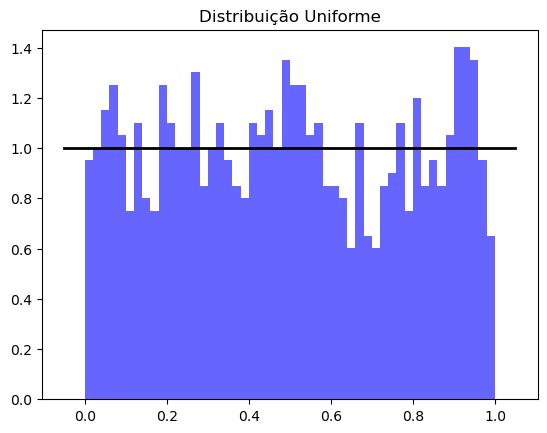

In [39]:
# Distribuição Uniforme
a = 0
b = 1
data_uniform = np.random.uniform(a, b, 1000)
plt.hist(data_uniform, bins=50, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.ones_like(x) / (b - a)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição Uniforme')
plt.show()

<img src="imagens/FIG3.jpeg" width="800" height="541" align="center" >

<img src="imagens/boxplotDistri.jpg">